In [33]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statistics import mean
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### 1.  Import the spam dataset and print the first six rows.  

In [34]:
df = pd.read_csv("/Users/katamezo/Documents/columbia/fall_2021/machine_learning/Mid-Term Data/spam_dataset.csv")
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [35]:
df.shape

(4601, 58)

### 2. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?
### 3.  Visualize the univariate distribution of each of the variables in the previous question.

I will give my reasoning after the varibales.

In [36]:
df['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

Text(0.5, 1.0, 'spam or ham?')

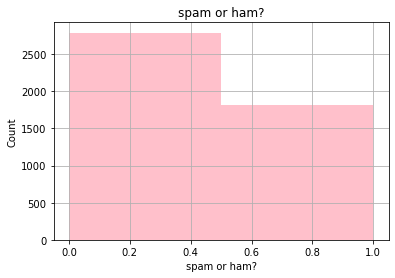

In [37]:
df['spam'].hist( color ='pink' , range=[0, 1], bins = 2)
plt.xlabel('spam or ham?')
plt.ylabel('Count')
plt.title('spam or ham?')

In [50]:
df['char_freq_$:'].describe()


count    4601.000000
mean        0.075811
std         0.245882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.052000
max         6.003000
Name: char_freq_$:, dtype: float64

Text(0.5, 1.0, 'Distbution of word - $')

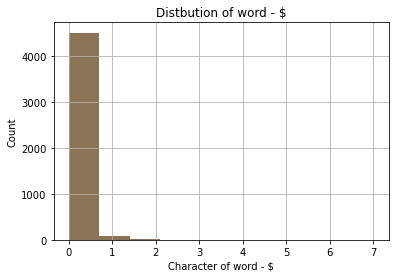

In [51]:
df['char_freq_$:'].hist(color='#8B7355', range=[0, 7]) #I set the range from the minimum value to the maximum value
plt.xlabel('Character of word - $')
plt.ylabel('Count')
plt.title('Distbution of word - $')

My first variable that I choose is the character frequency of $. Most spams usually offer something in order to raise and keep the attention on the email. One of the most frequent type of spam is the one that offers free and easily obtainable money. 

In [42]:
df['capital_run_length_average:'].describe()

count    4601.000000
mean        5.191515
std        31.729449
min         1.000000
25%         1.588000
50%         2.276000
75%         3.706000
max      1102.500000
Name: capital_run_length_average:, dtype: float64

Text(0.5, 1.0, 'Distribution of average length of uninterrupted sequences of capital letters')

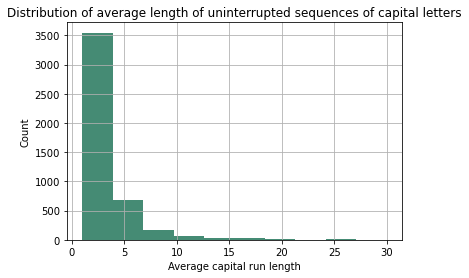

In [52]:
df['capital_run_length_average:'].hist(color='#458B74', range=[1, 30])
plt.xlabel('Average capital run length')
plt.ylabel('Count')
plt.title('Distribution of average length of uninterrupted sequences of capital letters')

My second choice of variable is the average length of uninterrupted sequences of capital letters. Similar to the other one, I assume that spams try to raise the attention of the reader. Capital lettering can be one way to do so. Spams can be full of prompts like: 'CLICK HERE', 'YOU WON'T BELIVE IT' etc. therefore I think this variable is realted to the dependent variable. 

In [54]:
df['word_freq_make:'].describe()

count    4601.000000
mean        0.104553
std         0.305358
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.540000
Name: word_freq_make:, dtype: float64

Text(0.5, 1.0, 'Distbution of word - make')

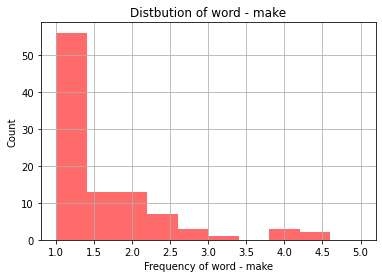

In [55]:
df['word_freq_make:'].hist(color='#FF6A6A', range=[1, 5])
plt.xlabel('Frequency of word - make')
plt.ylabel('Count')
plt.title('Distbution of word - make')

Lastly, I choose the variable 'word_freq_make:' that measures the frequency of the word, make. Some spam can promise to have a better life if you click on them. Therefore they can have prompts like: 'make money easily', 'make your life better', 'make your partner happy' etc. This is the reason why I think this can have a realtionship with the spam varibale. 

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".  

KNN

Logistic regression

Penalized regression

SVM

Decision tree

Bagged tree

Random forest


### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?


It is important to measure the accuracy of the model in an unbiased way. Test-train split is a method to evalute the model on the part of data that the model 'has not seen'. After we split the data into train and test data, we can use the train data to trian our model. This method is a fast and an easy way to compare the performances of different models as well.

### 6. What is k-fold cross validation and what do we use it for?

If we do not use cross-validation, the prediction and accuracy of our model depend on the random choice of train-test sets. This can cause validation problems, therefore we need to use a method: cross-validation. In the k-fold cross validaton, the training set is split into 'k' number smaller sets. Then the model will be trained on these training datasets. 

Resource: https://scikit-learn.org/stable/modules/cross_validation.html

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified k-fold is a variation of k-fold. These folds include the same percentage of samples of each target variable as the original set. This cross-validation method will keep the class ratio in both train and test sets. 

Resource: https://scikit-learn.org/stable/modules/cross_validation.html

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [56]:
#defining y and X (only three variable)
y = df['spam']
three_variable = ['char_freq_$:', 'capital_run_length_average:', 'word_freq_make:']

X=df[three_variable]
X.head(6)

,char_freq_$:,capital_run_length_average:,word_freq_make:
0,0.000,3.756,0.00
1,0.180,5.114,0.21
2,0.184,9.821,0.06
3,0.000,3.537,0.00
4,0.000,3.537,0.00
5,0.000,3.000,0.00


In [57]:
X.shape

(4601, 3)

In [58]:
# split the data into training and test subset 

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=0)
X_train.shape

(3450, 3)

In [59]:
#scaling

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# knn and GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid,)

grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.810
best parameters: {'n_neighbors': 9}
test-set score: 0.801


In [106]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

print("Training set score of KNN model: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score of KNN model: {:.3f}".format(knn.score(X_test_scaled, y_test)))
print("Mean of Cross Validation of KNN model, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

Training set score of KNN model: 0.833
Test set score of KNN model: 0.801
Mean of Cross Validation of KNN model, KFold: 0.810


In [65]:
y_pred = knn.predict(X_test_scaled)

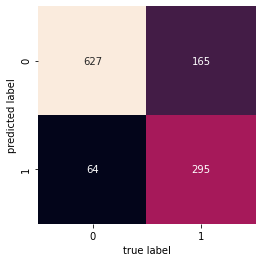

In [66]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

My first model is a KNN classifier. Before I started to work on the models, I preproccessed my data using StandardScalling. In order the find the parameters for my model, I used GridSearchCV. After running the GridSearchCV, the recommneded number of neighbors was 9. I used this parameter in my KNN classifier model, and the scaled X-es. My test score of KNN model is 0.801 and the mean of the cross-validation is 0.81. In order to vizualize the prediciton, I created a confunsion matrix of the model. As we can see, 295 of spam was classfied correctly, and 165 of spam was misclassified. While 627 ham email was classified well, and 64 of ham eamil was classified as spam. 

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?



In [67]:
#logistic and GridSearchCV
param_grid ={'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ka

best mean cross-validation score: 0.805
best parameters: {'C': 100, 'penalty': 'l2'}
test-set score: 0.792


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ka

In [105]:
logreg = LogisticRegression(C=0.01, penalty = 'l2').fit(X_train_scaled, y_train)

print("Training set score of Logreg model: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score of Logreg model: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
print("Mean of Cross Validation of first model, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train_scaled, y_train))))

Training set score of Logreg model: 0.755
Test set score of Logreg model: 0.731
Mean of Cross Validation of first model, KFold: 0.748


In [70]:
y_pred = logreg.predict(X_test_scaled)

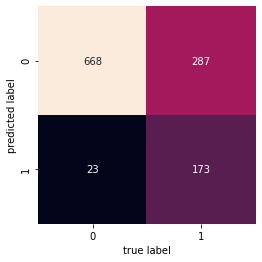

In [71]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Similarly to the previous model, I used GridSearchCV to find the parameters for the model. AFter that I used logistic regression with C = 100 and penalty = l2 (Ridge). The test score of the logisitic regression model is 0.731 and the cross validation is 0.748. Looking at the confusion matrix, we can tell the spam classification got signifcantly worse compare to the other model. Only 173 spam email was identified as spam and 287 spam email was identified as not spam.

This model accuracy is worse than the KNN classifier, therefore this model is not better. 

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [88]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.814
best parameters: {'C': 100, 'gamma': 1}
test-set score: 0.808


In [104]:
svc = SVC(C=100, gamma = 1).fit(X_train_scaled, y_train)

print("Training set score of SCV model: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test set score of SVC model: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print("Mean of Cross Validation of first model, KFold: {:.3f}".format(np.mean(cross_val_score(svc, X_train_scaled, y_train))))

Training set score of SCV model: 0.818
Test set score of SVC model: 0.808
Mean of Cross Validation of first model, KFold: 0.814


In [91]:
y_pred = svc.predict(X_test_scaled)

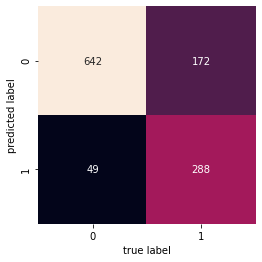

In [92]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

I use C=100, gamma=1 and kernel ='rbf', because GridSearchCV did recommended these parameters for the SVC model. Very large C means the margin is hard, while very small C mean the margin is soft.  After implementing these parameters to my model, the accuracy of my model is 0.808 and the mean of cross-validation turned out to be 0.814. Interestigly this model still misidentifed more spam than KNN, but the ham emails got claffied more times better. 

KNN was the best model until this point, but this accuracy point makes SVC model slighly better. 

### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [93]:
param_grid = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2,3,4] }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))


best mean cross-validation score: 0.818
best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}
test-set score: 0.816


In [120]:
tree = DecisionTreeClassifier( criterion = 'entropy', max_depth = 5, min_samples_leaf = 2).fit(X_train_scaled, y_train)

print("Training set score of tree model: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test set score of tree model: {:.3f}".format(tree.score(X_test_scaled, y_test)))
print("Mean of Cross Validation of first model, KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train_scaled, y_train))))

Training set score of tree model: 0.828
Test set score of tree model: 0.816
Mean of Cross Validation of first model, KFold: 0.818


In [95]:
y_pred = tree.predict(X_test_scaled)

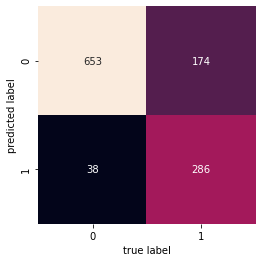

In [96]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

As my fourth model, I choose Decision tree. After running GridSearchCV, I used criterion = 'entropy', max_depth = 5, min_samples_leaf = 2 as the parameters for my model. Out of the four models, this model has the highest accuracy point, 0.816 and the highest cross-validation point as well, 0.818. Therefore desicion tree classifier is the best model among the four that I choose. 

Only 38 ham email and 174 spam were misclassfied. 

### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?

My best model was the Desicion tree classifier.

In [98]:
#defining y and X (another three variable)
six_variable_new = ['char_freq_$:', 'capital_run_length_average:', 'word_freq_make:', 'capital_run_length_total:', 'word_freq_address:', 'char_freq_(:']

Xnew=df[six_variable_new]
Xnew.head(6)

,char_freq_$:,capital_run_length_average:,word_freq_make:,capital_run_length_total:,word_freq_address:,char_freq_(:
0,0.000,3.756,0.00,278,0.64,0.000
1,0.180,5.114,0.21,1028,0.28,0.132
2,0.184,9.821,0.06,2259,0.00,0.143
3,0.000,3.537,0.00,191,0.00,0.137
4,0.000,3.537,0.00,191,0.00,0.135
5,0.000,3.000,0.00,54,0.00,0.223


In [100]:
# split the data into training and test subset 

Xnew_train, Xnew_test, y_train, y_test = train_test_split (Xnew, y, random_state=0)
Xnew_train.shape

(3450, 6)

In [101]:
#scaling

scaler = preprocessing.StandardScaler().fit(Xnew_train)
Xnew_train_scaled = scaler.transform(Xnew_train)
Xnew_test_scaled = scaler.transform(Xnew_test)

In [102]:
#to find the parameters I rerun GridSearchCV as well

param_grid = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2,3,4] }
 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(Xnew_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(Xnew_test_scaled, y_test)))

best mean cross-validation score: 0.826
best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2}
test-set score: 0.818


(I was not sure, that you expect me to find new parameters for the new X or use the model with the old paramters, so I rerun both ways.)

In [109]:
#Decision tree with the old parameters
tree = DecisionTreeClassifier( criterion = 'entropy', max_depth = 5, min_samples_leaf = 2).fit(Xnew_train_scaled, y_train)

print("Training set score of tree model: {:.3f}".format(tree.score(Xnew_train_scaled, y_train)))
print("Test set score of tree model: {:.3f}".format(tree.score(Xnew_test_scaled, y_test)))
print("Mean of Cross Validation of first model, KFold: {:.3f}".format(np.mean(cross_val_score(tree, Xnew_train_scaled, y_train))))

Training set score of tree model: 0.837
Test set score of tree model: 0.831
Mean of Cross Validation of first model, KFold: 0.817


In [132]:
#Decision tree with the new parameters
tree = DecisionTreeClassifier( criterion = 'gini', max_depth = 8, min_samples_leaf = 2).fit(Xnew_train_scaled, y_train)

print("Training set score of tree model: {:.3f}".format(tree.score(Xnew_train_scaled, y_train)))
print("Test set score of tree model: {:.3f}".format(tree.score(Xnew_test_scaled, y_test)))
print("Mean of Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(tree, Xnew_train_scaled, y_train))))

Training set score of tree model: 0.877
Test set score of tree model: 0.825
Mean of Cross Validation, KFold: 0.827


Model with the original three variables:
Training set score of SCV model: 0.828
Test set score of SVC model: 0.816
Mean of Cross Validation of first model, KFold: 0.817

After I added three more variables to the model I rerun my best model with the new X. According the accuracy and cross-validation point, DecisionTreeClassifier was the best model among all four. In the model, where I used the same parameters, the test-set accuracy point increased from 0.816 to 0.831. The cross-validation poin remained the same, 0,817.

If I compare with different parameters, the results changed as well. Since I had a different Xes, I rerun the GridSearchCV to find out whether I need new parameteres as well. After I used the new parameters, the Test set score increased significantly, from 0.816 to 0.825. The cross-validation point also increased from 0.817 to 0.827.

I can say, that both of my new models perform better than the 'original' model with three variables.


### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?


In [128]:
#model with KNN 

# knn and GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid,)

grid.fit(Xnew_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(Xnew_test_scaled, y_test)))

best mean cross-validation score: 0.814
best parameters: {'n_neighbors': 11}
test-set score: 0.815


In [129]:
knn = KNeighborsClassifier(n_neighbors=11).fit(Xnew_train_scaled, y_train)

print("Training set score of KNN model: {:.3f}".format(knn.score(Xnew_train_scaled, y_train)))
print("Test set score of KNN model: {:.3f}".format(knn.score(Xnew_test_scaled, y_test)))
print("Mean of Cross Validation of KNN model, KFold: {:.3f}".format(np.mean(cross_val_score(knn, Xnew_train_scaled, y_train))))

Training set score of KNN model: 0.838
Test set score of KNN model: 0.815
Mean of Cross Validation of KNN model, KFold: 0.814


First KNN with three variables: 
Training set score of KNN model: 0.833
Test set score of KNN model: 0.801
Mean of Cross Validation of KNN model, KFold: 0.810

The KNN classifier did not get better with six varibles compared to the previous model with three variables. The test set accuracy point is 0.815 while the cross-validation point 0.814. Both of hte points are worse than the first model, and definetly worse than the DesicionTree model.

In [127]:
#model with logistic regression 
#logistic and GridSearchCV
param_grid ={'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(Xnew_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(Xnew_test_scaled, y_test)))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ka

best mean cross-validation score: 0.811
best parameters: {'C': 1000, 'penalty': 'l2'}
test-set score: 0.797


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


In [133]:
logreg = LogisticRegression(C=1000, penalty = 'l2').fit(Xnew_train_scaled, y_train)

print("Training set score of Logreg model: {:.3f}".format(logreg.score(Xnew_train_scaled, y_train)))
print("Test set score of Logreg model: {:.3f}".format(logreg.score(Xnew_test_scaled, y_test)))
print("Mean of Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, Xnew_train_scaled, y_train))))

Training set score of Logreg model: 0.811
Test set score of Logreg model: 0.797
Mean of Cross Validation, KFold: 0.811


Logisitc regression with three variables: 
Training set score of Logreg model: 0.755
Test set score of Logreg model: 0.731
Mean of Cross Validation of first model, KFold: 0.748

This logistic regression model got better compared to the one with three variables. The test-set score increased from 0.731 to 0.797, while the cross-validation increased from 0.748 to 0.811. This cross-validation score is very close to the DecisonTree model, but still lower. 

In [131]:
#model with SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(Xnew_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(Xnew_test_scaled, y_test)))

best mean cross-validation score: 0.833
best parameters: {'C': 100, 'gamma': 1}
test-set score: 0.811


In [134]:
svc = SVC(C=100, gamma = 1).fit(Xnew_train_scaled, y_train)

print("Training set score of SCV model: {:.3f}".format(svc.score(Xnew_train_scaled, y_train)))
print("Test set score of SVC model: {:.3f}".format(svc.score(Xnew_test_scaled, y_test)))
print("Mean of Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(svc, Xnew_train_scaled, y_train))))

Training set score of SCV model: 0.865
Test set score of SVC model: 0.811
Mean of Cross Validation, KFold: 0.833


SVC model with three variable: 
Training set score of SCV model: 0.818
Test set score of SVC model: 0.808
Mean of Cross Validation of first model, KFold: 0.814

After finidng new parameters for the SVC model, this model's predicitve power became one of the best among all of them. The accuracy score raised from 0.808 to 0.811 and the cross-validation jumped from 0.814 to 0.833. 

Looking at the models, I would choose the SCV model with six varibale to predict whether the email is a spam or ham. The reason is because the mean of the cross-validation score is the highest among all the 8 models. 

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

Some other characters could increase the predictive power of the model like questionmark. Word frequence of congratuation can be also interesting in the model.

I would be curious about the number of embedded links as well. For example how many times the same link is in the email, or even just whether there is an embedded link or not. Furthermore even pictures, or clickable pictures can be a good measurement of spam email as well. 

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

KNN

Linear Regression

Ridge

Lasso

SVM

Decision tree

Bagged tree

Random forest